# Import Libraries

In [1]:
# Scientific libraries

import numpy as np
import math

# Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data analysis and ML libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import train_test_split


# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.under_sampling import RandomUnderSampler, NearMiss,TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN


from imblearn.pipeline import Pipeline, make_pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Import training and test sets

In [3]:
#X_train = pd.read_csv('Da')
X_train = pd.read_csv('Data/best_training_feat.csv')
y_train = pd.read_csv('Data/training_target.csv')
X_test = pd.read_csv('Data/best_test_feat.csv')
y_test = pd.read_csv('Data/test_target.csv')

In [4]:
X_train.shape


(183579, 9)

In [5]:
X_test.shape

(45895, 9)

# Build Model

In [6]:
target_count = y_train.value_counts(normalize=True)
print("The classes percentages are:")
print(target_count)

The classes percentages are:
Diabetes_status
0                  0.847052
1                  0.152948
dtype: float64


### Baseline: train the model without resampling/balancing the data

In this case, we want to build a diabetes predictor. Therefore we need to minimize the numbers of false positives in our model

- Therefore we need to minimize the numbers of false positives in our model
- We want a recall as close to 1 as possible
- We want an F1-score of at least 0.5

In [7]:
target_count = y_train.value_counts(normalize=True)
acc_baseline = target_count.max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.85


In [8]:
## Build model
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

## Fit model to training data
model.fit(X_train,y_train)

## Classification report
print("Classification report for training data")
print(classification_report(y_train,model.predict(X_train)))

print("Classification report for test data")
print(classification_report(y_test,model.predict(X_test)))

Classification report for training data
              precision    recall  f1-score   support

           0       0.86      0.98      0.92    155501
           1       0.53      0.14      0.22     28078

    accuracy                           0.85    183579
   macro avg       0.70      0.56      0.57    183579
weighted avg       0.81      0.85      0.81    183579

Classification report for test data
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     38876
           1       0.54      0.14      0.23      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895



In [9]:
recall_baseline = recall_score(y_train,model.predict(X_train))
f1_baseline = f1_score(y_train,model.predict(X_train))
print("Baseline Recall:", round(recall_baseline, 2))
print("Baseline F1:", round(f1_baseline, 2))

Baseline Recall: 0.14
Baseline F1: 0.22


REMARKS:

- Accuracy: same as baseline for both training and test sets
- Recall: Very low -> only 14 % of positives in the test set are correctly identified by the model
- F1: Low as well (0.22) -> Typically a good recall score lies between 0.5-0.8

## Iterate and evaluate

### Train the model imposing a balanced class weight!

- Imposing a balanced class weight deals with the class imbalance!
- Later we can try resampling the data

Classification report for test data
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     38876
           1       0.32      0.76      0.45      7019

    accuracy                           0.71     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.71      0.75     45895



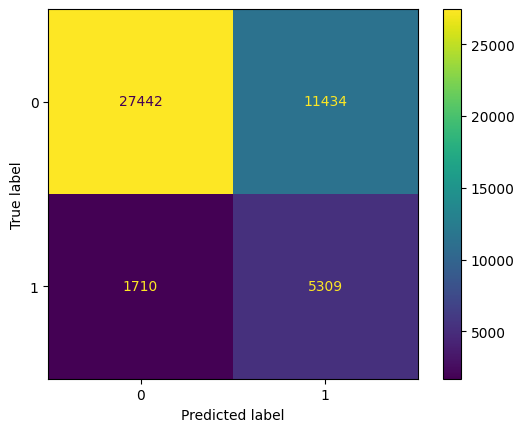

In [10]:
## Build model
model = make_pipeline(
    RobustScaler(),
    LogisticRegression(max_iter=1000,class_weight='balanced')
)

## Fit model to training data
model.fit(X_train,y_train)

print("Classification report for test data")
print(classification_report(y_test,model.predict(X_test)))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [11]:
recall_baseline = recall_score(y_train,model.predict(X_train))
f1_baseline = f1_score(y_train,model.predict(X_train))
print("Train Recall:", round(recall_baseline, 2))
print("Train F1:", round(f1_baseline, 2))

Train Recall: 0.75
Train F1: 0.45


In [12]:
recall_baseline = recall_score(y_test,model.predict(X_test))
f1_baseline = f1_score(y_test,model.predict(X_test))
print("Test Recall:", round(recall_baseline, 2))
print("Test F1:", round(f1_baseline, 2))

Test Recall: 0.76
Test F1: 0.45


REMARKS:

- Test Recall: Good. Also slightly beats the training recall -> 76 % of positives in the test set are correctly identified by the model
- F1: We get 0.45. Ideally, we would like to get an F1 of at least 0.5!
- In general, the model is struggling to correctly identify positives and negatives

## Communicate 

In [13]:
# Coefficients of the regression

importances = model.named_steps['logisticregression'].coef_[0]

Text(0.5, 1.0, 'Odds ratio by feature')

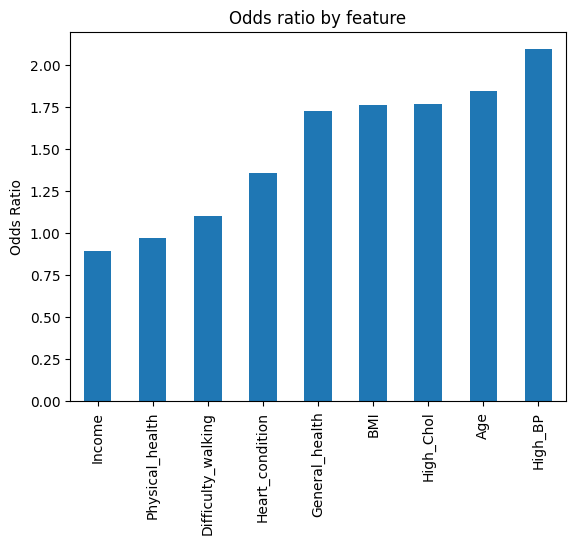

In [14]:
#Odds ratio

feat_imp = pd.Series(np.exp(importances), index=X_train.columns).sort_values()
feat_imp.plot(kind="bar");
#plt.xlabel("Features")
plt.ylabel("Odds Ratio")
plt.title("Odds ratio by feature")